# # 📝 MNIST Classification - Demo Notebook
# ## Task 1: Train & Evaluate RF, FNN, CNN


# ---
# ### 📌 Step 0 Install Dependencies
# ---

In [1]:
%pip install -q -r requirements.txt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# ---
# ### 📌 Step 1 Import Dependencies
# ---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from mnist_classifier.mnist_classifier import MnistClassifier  # Import our unified classifier



# ---
# ### 📌 Step 2: Load MNIST Dataset
# ---


In [3]:
# Define transforms for data normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Print dataset size
print(f"📊 Training Data: {len(train_dataset)} samples")
print(f"📊 Testing Data: {len(test_dataset)} samples")

📊 Training Data: 60000 samples
📊 Testing Data: 10000 samples


# ---
# ### 📌 Step 3: Train & Evaluate Models (RF, FNN, CNN)
# ---


In [4]:
# List of models to train
models = ["rf", "nn", "cnn"]
trained_models = {}

# Train and store models
for model_name in models:
    print(f"\n🚀 Training {model_name.upper()} model...")
    classifier = MnistClassifier(algorithm=model_name)
    classifier.train(train_loader, test_loader, epochs=5)
    trained_models[model_name] = classifier
    print(f"✅ {model_name.upper()} training complete!")



🚀 Training RF model...
Training started
Training finished
✅ RF training complete!

🚀 Training NN model...
Epoch 1/5


100%|██████████| 938/938 [00:49<00:00, 19.05it/s]


Epoch 2/5


100%|██████████| 938/938 [00:54<00:00, 17.35it/s]


Epoch 3/5


100%|██████████| 938/938 [00:46<00:00, 19.99it/s]


Epoch 4/5


100%|██████████| 938/938 [00:39<00:00, 23.85it/s]


Epoch 5/5


100%|██████████| 938/938 [00:54<00:00, 17.30it/s]


Testing


100%|██████████| 157/157 [00:07<00:00, 19.66it/s]


✅ NN training complete!

🚀 Training CNN model...
Epoch 1/5


100%|██████████| 938/938 [01:16<00:00, 12.34it/s]


Epoch 2/5


100%|██████████| 938/938 [00:48<00:00, 19.33it/s]


Epoch 3/5


100%|██████████| 938/938 [00:57<00:00, 16.36it/s]


Epoch 4/5


100%|██████████| 938/938 [00:56<00:00, 16.56it/s]


Epoch 5/5


100%|██████████| 938/938 [00:52<00:00, 17.78it/s]


Testing


100%|██████████| 157/157 [00:05<00:00, 27.14it/s]

✅ CNN training complete!


# ---
# ### 📌 Step 4: Evaluate & Compare Models
# ---

In [5]:
def evaluate_model(classifier, test_loader):
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        outputs = classifier.predict(images)
        correct += (outputs == labels).sum().item()
        total += labels.size(0)

    return 100 * correct / total

# Compute accuracy for each model
model_accuracies = {name: evaluate_model(classifier, test_loader) for name, classifier in trained_models.items()}

# Print accuracy results
for model, acc in model_accuracies.items():
    print(f"🎯 {model.upper()} Accuracy: {acc:.2f}%")

🎯 RF Accuracy: 96.85%
🎯 NN Accuracy: 94.11%
🎯 CNN Accuracy: 98.33%


# ---
# ### 📌 Step 5: Run Inference on Sample Images
# ---


📌 Running inference for image 7292...


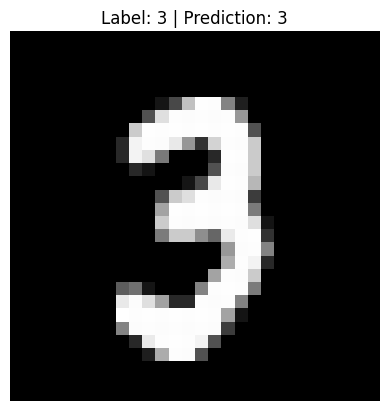


📌 Running inference for image 9261...


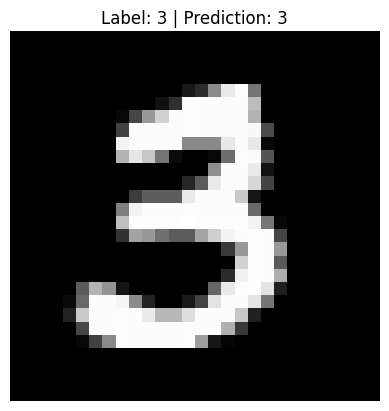


📌 Running inference for image 9706...


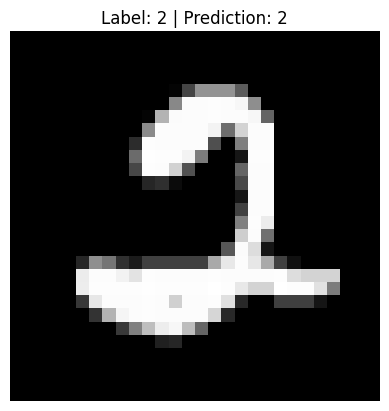


📌 Running inference for image 7539...


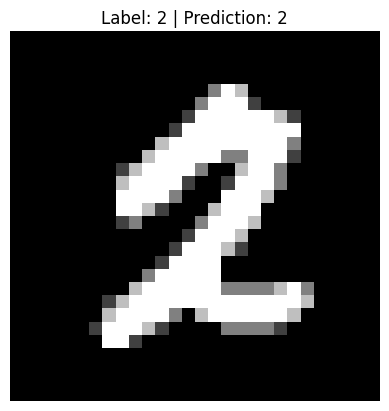


📌 Running inference for image 2896...


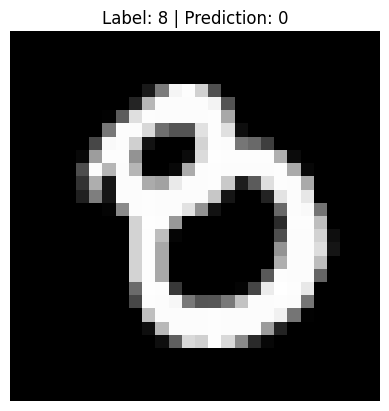

In [6]:
def show_prediction(classifier, image, label):
    """Runs inference and displays the image + prediction."""
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis("off")

    # Predict using the classifier
    image = image.unsqueeze(0)  # Add batch dimension
    prediction = classifier.predict(image)

    plt.title(f"Label: {label} | Prediction: {prediction.item()}")
    plt.show()

# Test images from dataset
num_samples = 5
sample_indices = np.random.choice(len(test_dataset), num_samples, replace=False)

for idx in sample_indices:
    image, label = test_dataset[idx]
    print(f"\n📌 Running inference for image {idx}...")
    show_prediction(trained_models["cnn"], image, label)  # Change model here (cnn, rf, nn)


# ---
# ### 📌 Step 6: Compare Model Performance
# ---


C:\Users\Volodia\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


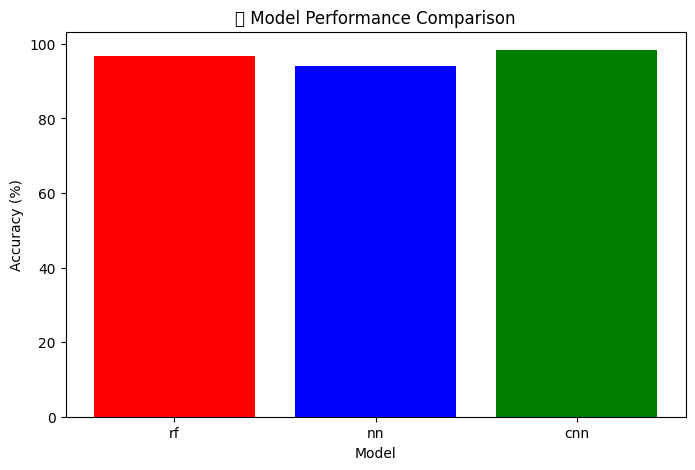

In [7]:
# Plot performance
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=["red", "blue", "green"])
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("🎯 Model Performance Comparison")
plt.show()